Deskripsi yang digunakan untuk memanggil dataset

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge , Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler ,MinMaxScaler

Memanggil Dataset

In [24]:
df = pd.read_csv('boston.csv')
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


Deskripsi Dataset

In [25]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B - 1000', 'LSTAT', 'MEDV']
df = pd.read_csv('boston.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B - 1000,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    float64
 10  PTRATIO   506 non-null    float64
 11  B - 1000  506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<Axes: >

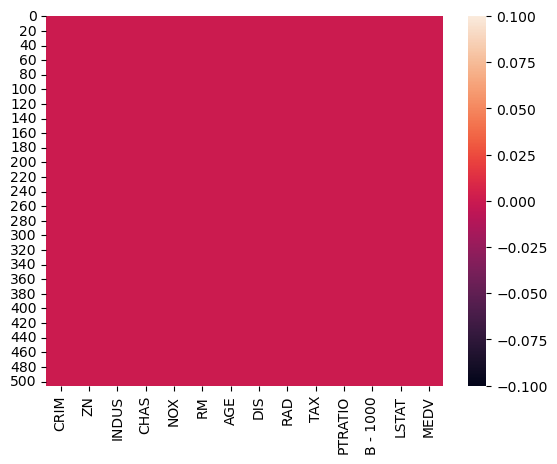

In [27]:
sns.heatmap(df.isnull())

In [28]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B - 1000,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

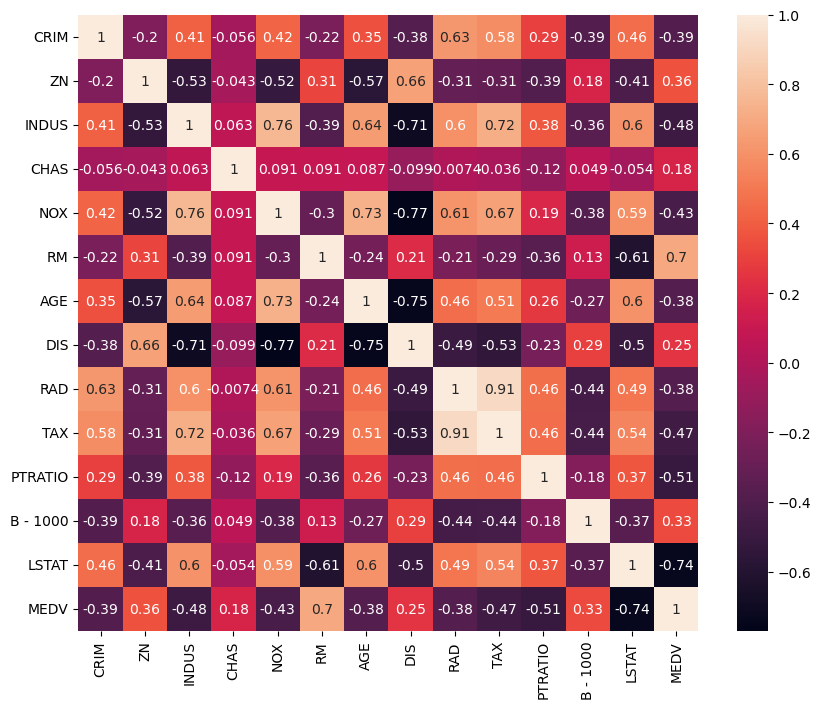

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [30]:
droped_columns_2=[]
for col , num in zip( df.astype('object').nunique().index,df.astype('object').nunique().values):
    if num ==1:
        droped_columns_2.append(col)
        
droped_columns_2 

[]

In [31]:
# how to deal outliers 
mask1=df['RM']>4.7
mask2=df['RM']<7.8
mask3=df['LSTAT']<32
mask4=df['MEDV']<37
#df=df[mask1&mask2 &mask4]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B - 1000,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [32]:
df.drop(columns='RAD',inplace=True)

In [33]:
df.drop(columns=[ 'CRIM','ZN','DIS','PTRATIO','B - 1000'],inplace=True)

In [34]:
df.skew().sort_values(ascending=False)

CHAS     3.405904
MEDV     1.108098
LSTAT    0.906460
NOX      0.729308
TAX      0.669956
RM       0.403612
INDUS    0.295022
AGE     -0.598963
dtype: float64

In [35]:
for col in df.drop(columns='CHAS').columns:
    if np.abs(df[col].skew()) > 0.5:
        df[col] = np.log1p(df[col])

In [36]:
y=df['MEDV']
X=df.drop(columns='MEDV')

In [37]:
X

,INDUS,CHAS,NOX,RM,AGE,TAX,LSTAT
0,2.31,0,0.430483,6.575,4.192680,5.693732,1.788421
1,7.07,0,0.384582,6.421,4.380776,5.493061,2.316488
2,7.07,0,0.384582,7.185,4.128746,5.493061,1.615420
3,2.18,0,0.377066,6.998,3.845883,5.407172,1.371181
4,2.18,0,0.377066,7.147,4.010963,5.407172,1.845300
...,...,...,...,...,...,...,...
501,11.93,0,0.452985,6.593,4.249923,5.613128,2.367436
502,11.93,0,0.452985,6.120,4.352855,5.613128,2.310553
503,11.93,0,0.452985,6.976,4.521789,5.613128,1.893112
504,11.93,0,0.452985,6.794,4.503137,5.613128,2.012233


Split Data training dan data testing

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

Membuat Model Regresi Liniar

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_train)

In [40]:
score = model.score(X_train, y_train)
score

0.7470925755320794

In [41]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.7470925755320794

Membuat Inputan Model Regresi Linear

In [42]:
input_data = (2.31, 0, 0.430483, 6.575, 4.192680, 5.693732, 1.788421)
input_data_np = np.array(input_data)
input_data_reshape = input_data_np.reshape(1,-1)

# std_data = scaler.transform(input_data_reshape)

prediksi = model.predict(input_data_reshape)
print(prediksi)

[3.48233241]


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Menyimpan Model

In [43]:
import pickle

filename = 'PrediksiBoston3.sav'
pickle.dump(model, open(filename, 'wb'))